In [104]:
import nibabel as nib
import hcp_utils as hcp
import numpy as np
# Specify the path to the NIfTI file
nifti_path = '/Users/adam/Downloads/sub-MDMA001_ses-00_task-emotion_acq-mb_dir-pe0_run-0_space-MNI152NLin6Asym_res-2_desc-denoised_bold.nii.gz'
# Load the NIfTI file
nifti_image = nib.load(nifti_path)
nifti_data=nifti_image.get_fdata()

# Get the header from the NIfTI image
nifti_header = nifti_image.header

# Retrieve the resolution
resolution = nifti_header.get_zooms()

# Print the resolution
print("Resolution:", resolution)

Resolution: (2.0, 2.0, 2.0, 1.0)


In [105]:
import matplotlib.pyplot as plt

Resolution: (2.0, 2.0, 2.0)


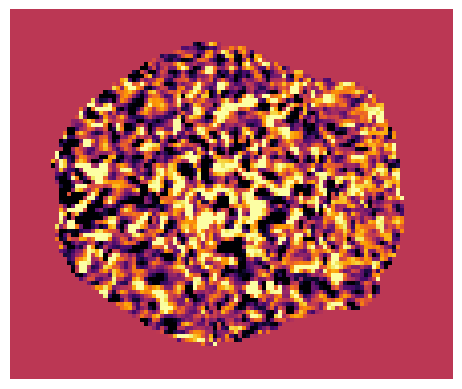

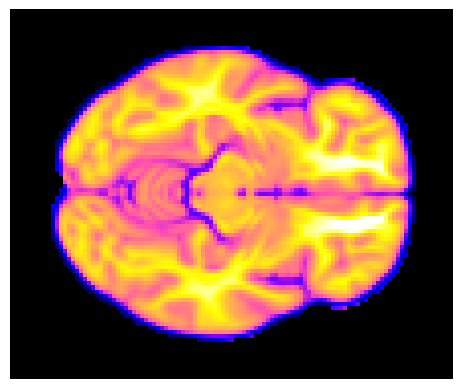

(22, 21, 13, 187)

In [106]:
# Define the bounding box coordinates
y_start, y_end = 45, 66
x_start, x_end = 33, 55
z_start, z_end = 33, 46

# Extract the spatial subset
subset = nifti_data[x_start:x_end, y_start:y_end, z_start:z_end,:]

# and plot slices on MNI to clarify exactly what space is being inquiried
mni_path = '/Users/adam/Downloads/MNI152_T1_2mm_Brain.nii.gz'
# Load the NIfTI file
mni_image = nib.load(mni_path)
mni_data=mni_image.get_fdata()

# Extract the spatial subset
mnisubset = mni_data[x_start:x_end, y_start:y_end, z_start:z_end]
# Get the header from the NIfTI image
nifti_header = mni_image.header

# Retrieve the resolution
resolution = nifti_header.get_zooms()

# Print the resolution
print("Resolution:", resolution)

# Plot the central slice along the z-axis (assuming it's the axial plane)
z_slice = 30
plt.imshow(nifti_data[:, :, z_slice,0], cmap='inferno',vmin=-10, vmax=10)
plt.axis('off')
plt.show()

plt.imshow(mni_data[:, :, z_slice], cmap='gnuplot2',vmin=0,vmax=8000)
plt.axis('off')
plt.show()

subset.shape

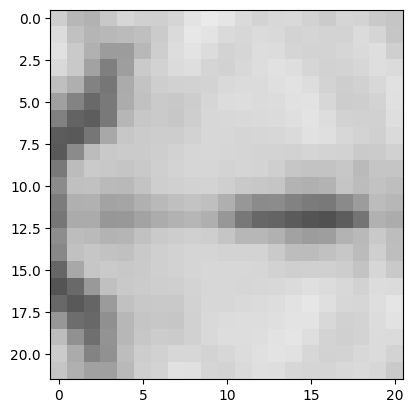

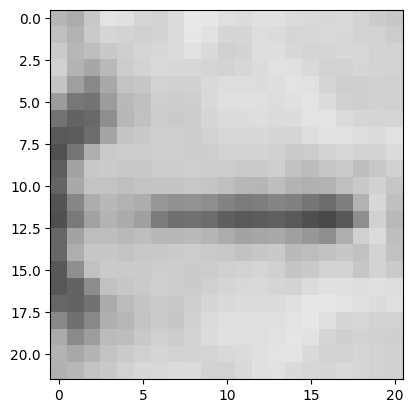

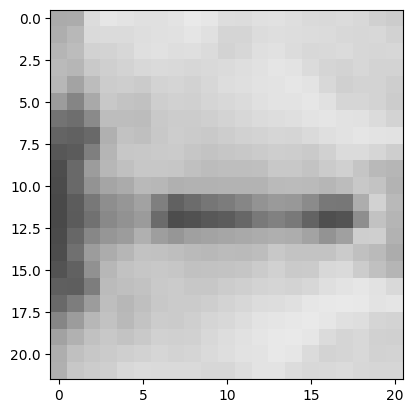

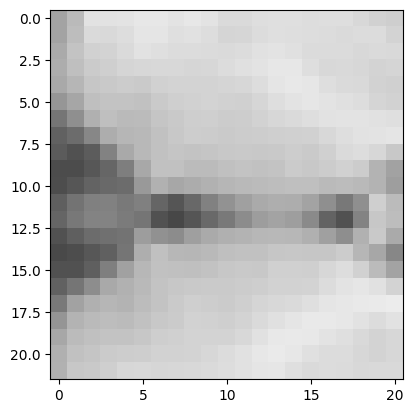

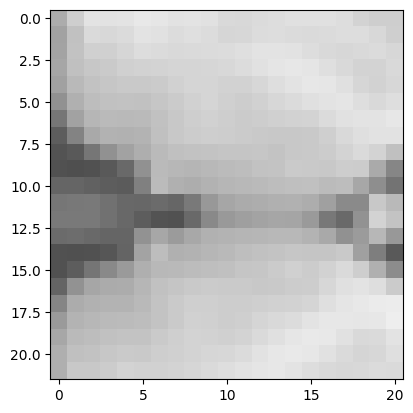

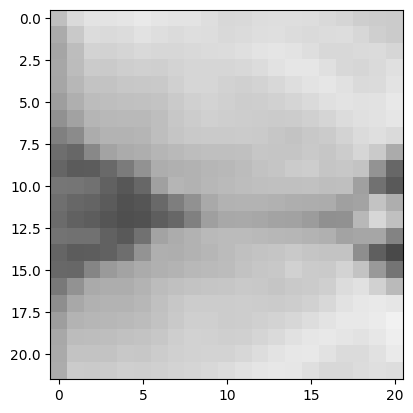

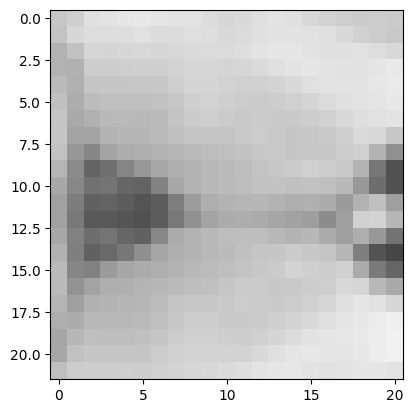

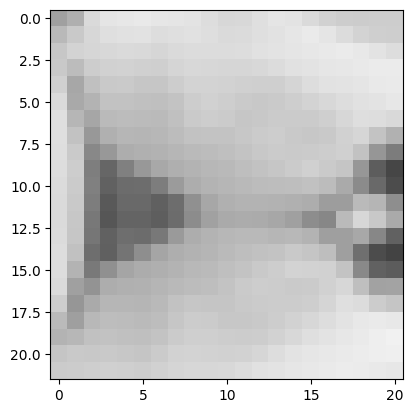

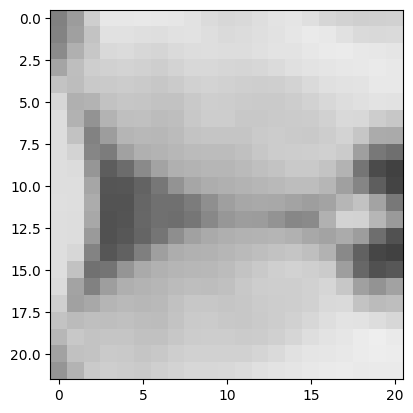

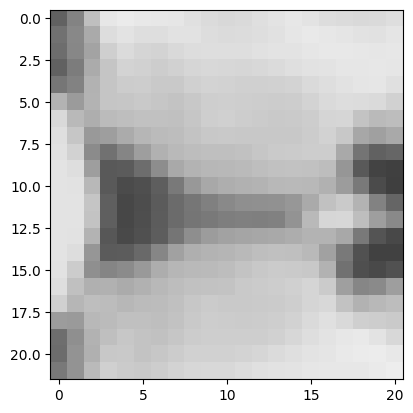

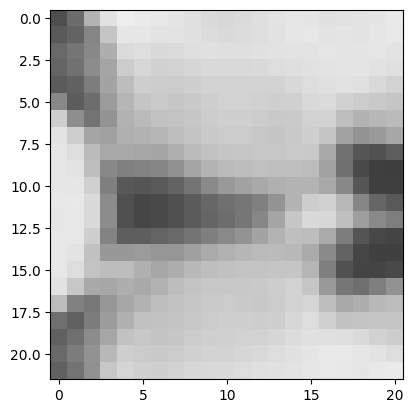

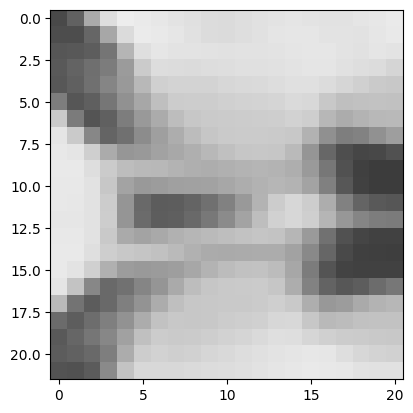

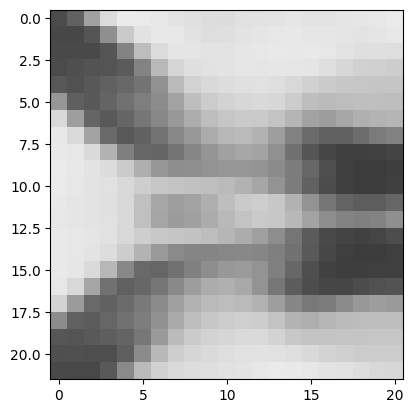

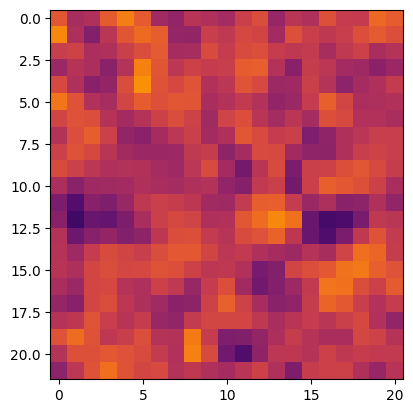

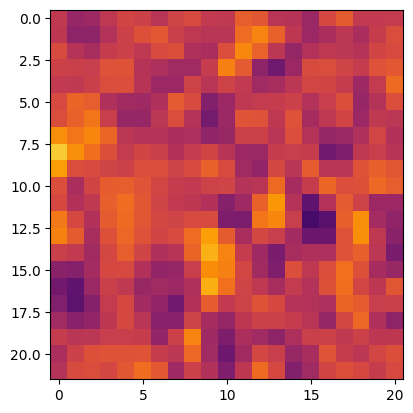

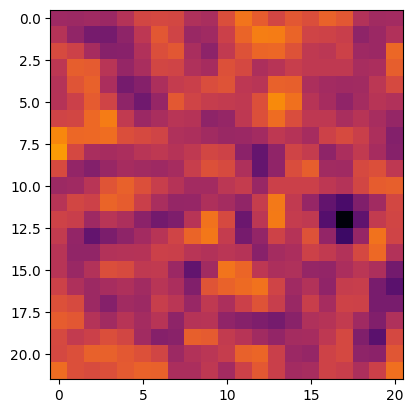

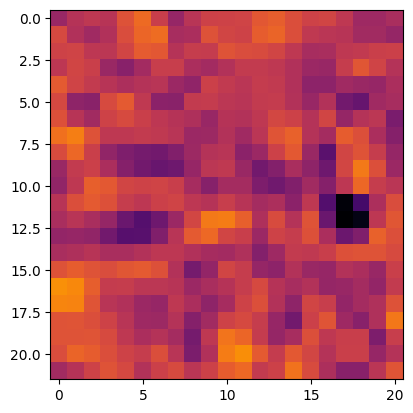

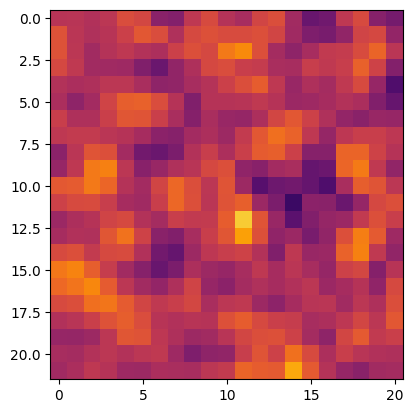

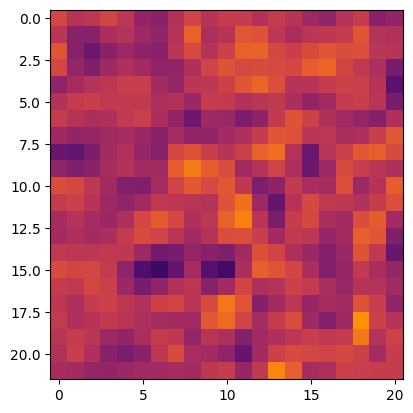

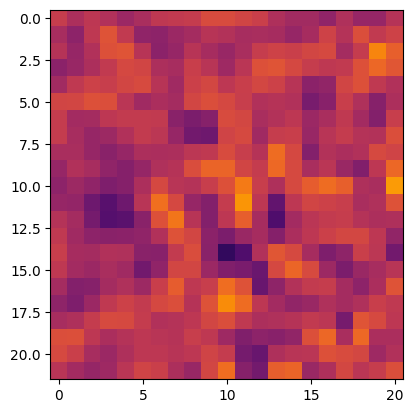

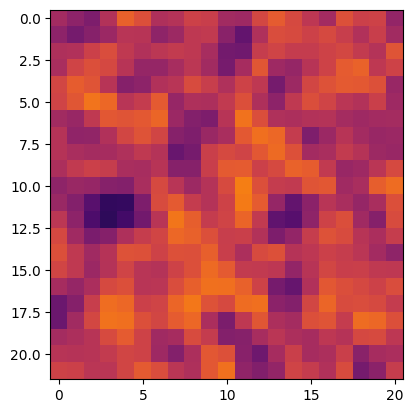

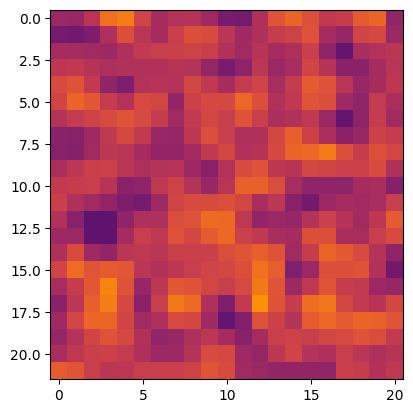

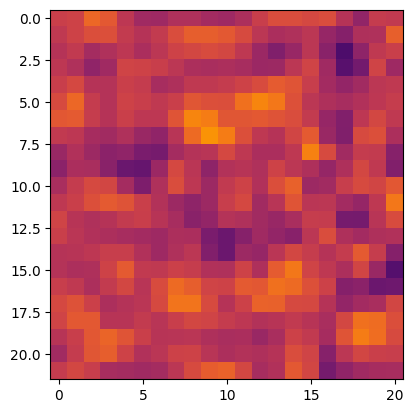

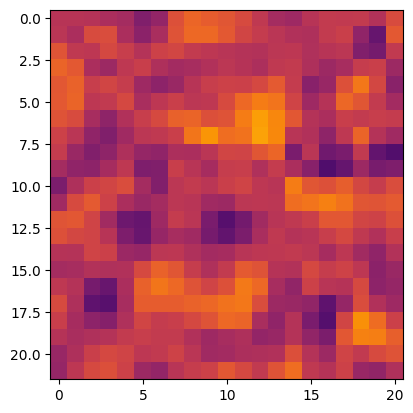

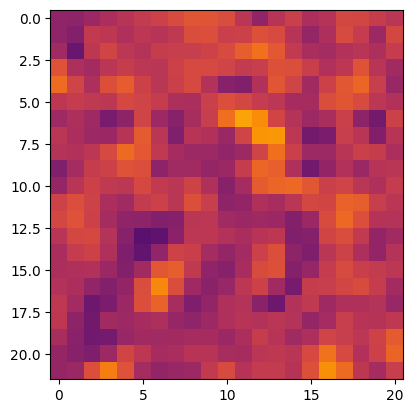

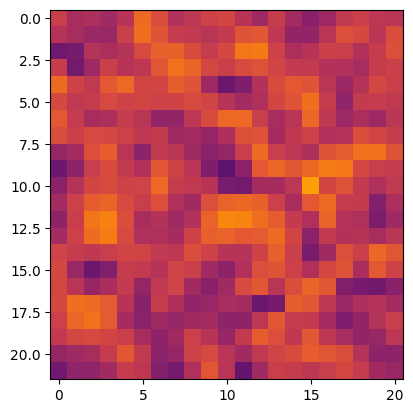

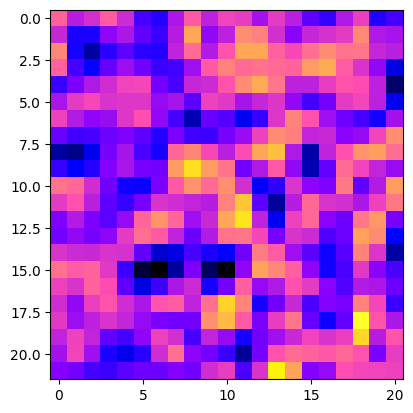

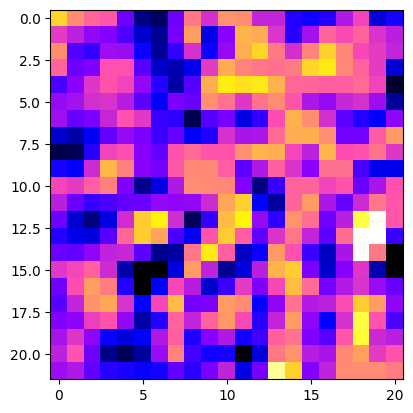

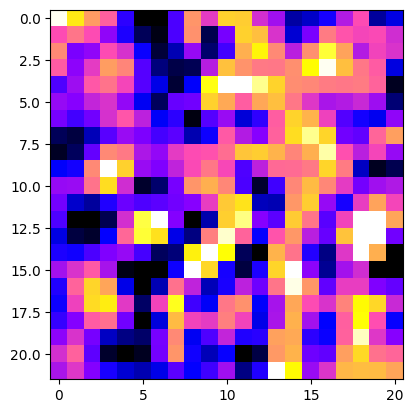

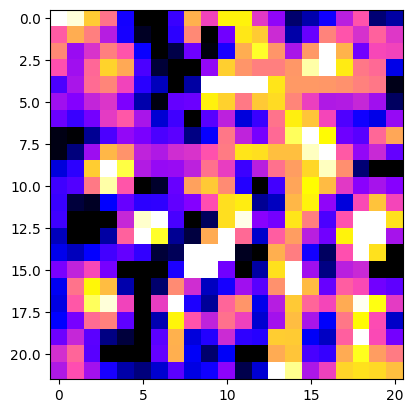

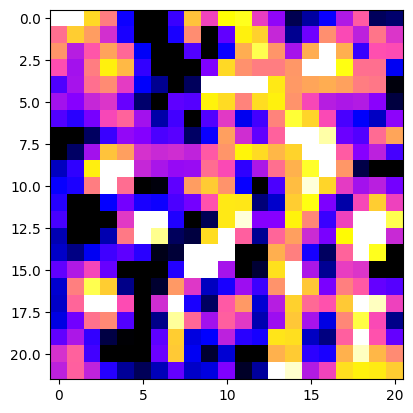

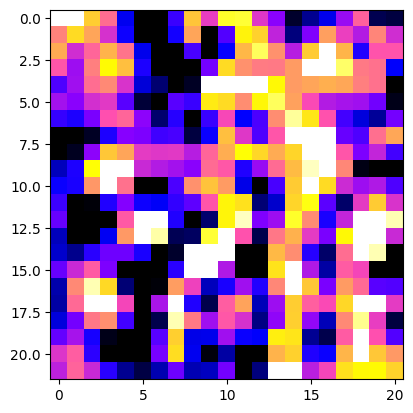

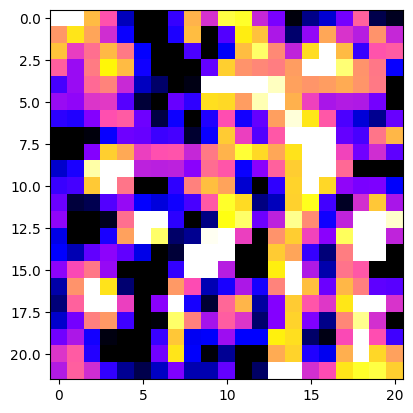

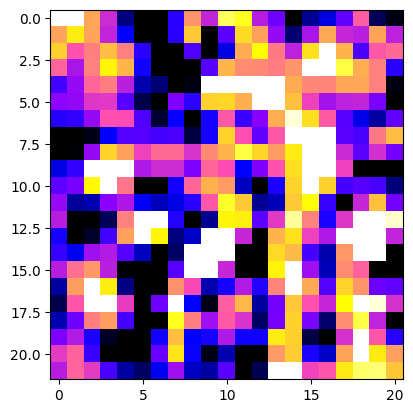

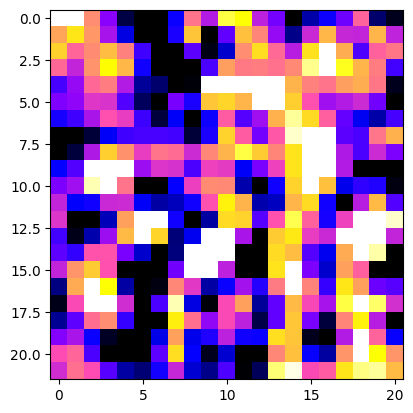

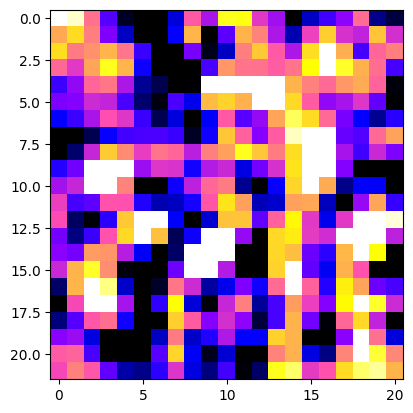

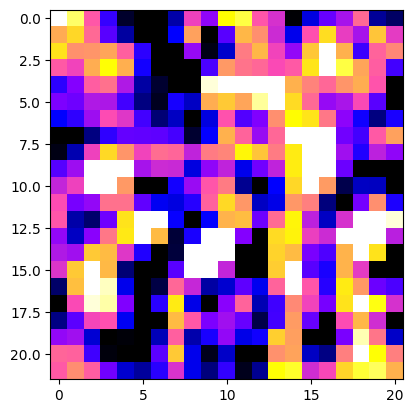

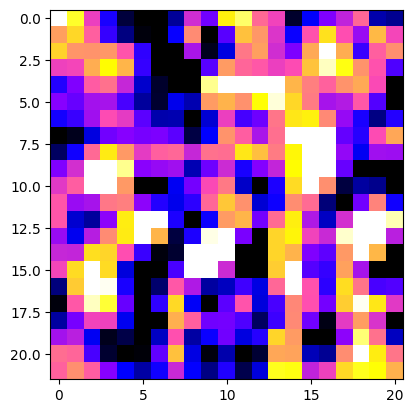

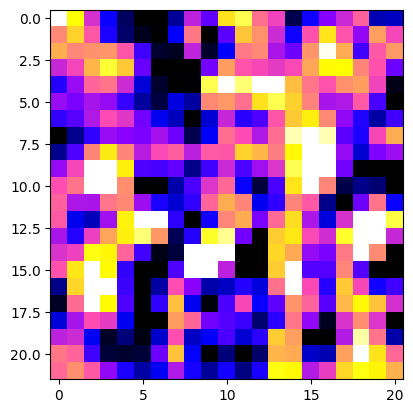

In [107]:
num_slices = z_end - z_start

for i, z_slice in enumerate(range(z_start, z_end)):
    plt.imshow(mnisubset[:, :, i], cmap='gray',vmin=0, vmax=8000)
    plt.show()
 
# same spatial dimensions for one functional image
for i, z_slice in enumerate(range(z_start, z_end)):
    plt.imshow(subset[:, :, i,0], cmap='inferno',vmin=-50, vmax=50)
    plt.show()
    
# one slice over time
for i, z_slice in enumerate(range(z_start, z_end)):
    plt.imshow(subset[:, :, 5,i], cmap='gnuplot2',vmin=-30, vmax=30)
    plt.show() 

In [110]:
subset.shape
# now that the box is bounded, try fitting a few optical flow methods in first three frames

(22, 21, 13, 187)

In [111]:
original_image.shape

(22, 21, 13, 187)

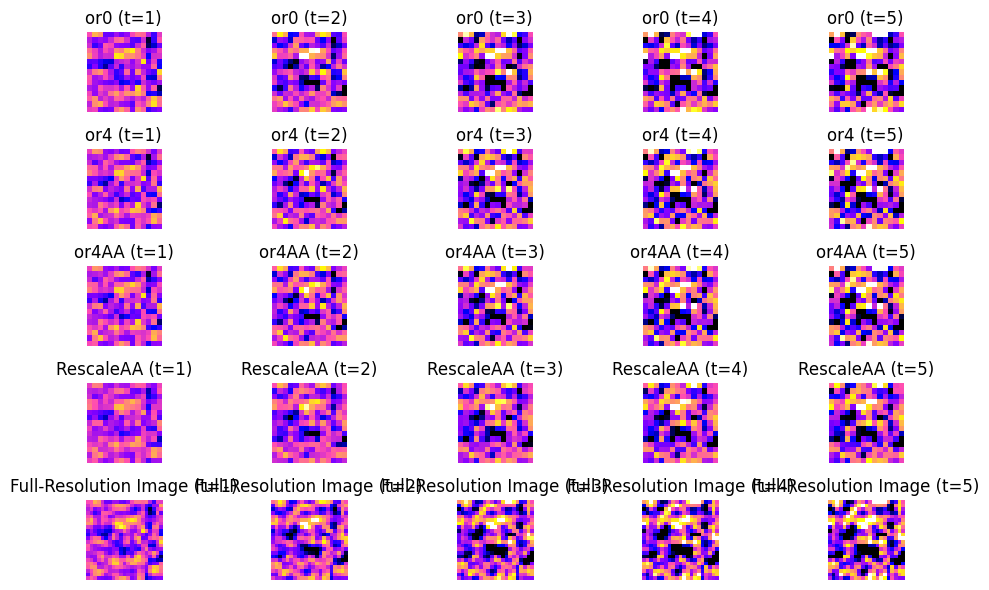

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage.transform as skTrans

# Load the original 3D image
original_image = subset

# Define the desired downsampled shape (2/3rds resolution except temporal dimension)
downsampled_shape = (15, 14, 9, subset.shape[3])

# Downsample the original image using resize from skimage.transform
result1 = np.zeros(downsampled_shape)
for i in range(subset.shape[3]):
    result1[:, :, :, i] = skTrans.resize(original_image[:, :, :, i], (15, 14, 9), order=0, preserve_range=True)

# Downsample the original image using resize from skimage.transform: try different parameters
result2 = np.zeros(downsampled_shape)
for i in range(subset.shape[3]):
    result2[:, :, :, i] = skTrans.resize(original_image[:, :, :, i], (15, 14, 9), order=4, preserve_range=True)

# Downsample the original image using resize from skimage.transform: try different parameters
result3 = np.zeros(downsampled_shape)
for i in range(subset.shape[3]):
    result3[:, :, :, i] = skTrans.resize(original_image[:, :, :, i], (15, 14, 9), order=4, preserve_range=True, anti_aliasing=True)

# Downsample the original image using rescale from skimage.transform: try different parameters
result4 = np.zeros(downsampled_shape)
for i in range(subset.shape[3]):
    result4[:, :, :, i] = skTrans.rescale(original_image[:, :, :, i], (2/3), preserve_range=True, anti_aliasing=True)

# Define the z-slice index to visualize
z_slice_full_res = 9
z_slice_downsampled = int(z_slice_full_res / (subset.shape[2] / downsampled_shape[2]))

# Define the figure size and subplot arrangement
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 6))

# Plot the downsampled and full-resolution images
for i in range(5):
    # Plot the downsampled image
    col_idx = i
    axes[0, col_idx].imshow(result1[:, :, z_slice_downsampled, i], cmap='gnuplot2', vmin=-30, vmax=30)
    axes[0, col_idx].set_title("or0 (t={})".format(i+1))
    axes[0, col_idx].axis('off')

    # param 2
    axes[1, col_idx].imshow(result2[:, :, z_slice_downsampled, i], cmap='gnuplot2', vmin=-30, vmax=30)
    axes[1, col_idx].set_title("or4 (t={})".format(i+1))
    axes[1, col_idx].axis('off')

    # param 3
    axes[2, col_idx].imshow(result3[:, :, z_slice_downsampled, i], cmap='gnuplot2', vmin=-30, vmax=30)
    axes[2, col_idx].set_title("or4AA (t={})".format(i+1))
    axes[2, col_idx].axis('off')

    # param 4
    axes[3, col_idx].imshow(result4[:, :, z_slice_downsampled, i], cmap='gnuplot2', vmin=-30, vmax=30)
    axes[3, col_idx].set_title("RescaleAA (t={})".format(i+1))
    axes[3, col_idx].axis('off')

    # Plot the full-resolution image
    axes[4, col_idx].imshow(subset[:, :, z_slice_full_res, i], cmap='gnuplot2', vmin=-30, vmax=30)
    axes[4, col_idx].set_title("Full-Resolution Image (t={})".format(i+1))
    axes[4, col_idx].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [81]:
result4.shape

(15, 14, 9, 187)

In [150]:
from imes4d.PyrLK3D import PyrLK3D
from imes4d.utils import Timer, ransac, blend_volumes, create_dummy_data
from mpl_toolkits.mplot3d import Axes3D
# create image 1 and 2 from bounded box of fmri series image 1 and 2
image1=result4[:,:,:,0].astype(np.float32)
image2=result4[:,:,:,1].astype(np.float32)
image3=result4[:,:,:,2].astype(np.float32)
# Create the array listing every point
indices = np.mgrid[0:14, 0:13, 0:8]
points = np.transpose(indices.reshape(3, -1))
# Access the values at each point in the subset
prev_pts=points

In [140]:
prev_pts.shape

(1456, 3)

In [141]:
# create the optical flow object
lk = PyrLK3D(image1, image2, prev_pts, win_size=(5, 5, 5), levels=3, eps=1e-3, max_iterations=200)

In [142]:
# calculate optical flow, pyramidal lukas-kanade (https://github.com/mlaves/imes4d/blob/master/imes4d/PyrLK3D.py)
with Timer('pyr_lk'):
        flow, err, it = lk.calc_flow()

[pyr_lk]
Elapsed: 597.75847697258 s


In [143]:
# find best 25 % matches
mean_err = np.mean(np.sort(err)[:int(len(err) / 4)])
best_flow = np.array([i for i, e in zip(flow, err) if e < mean_err])
best_prev = np.array([i for i, e in zip(prev_pts, err) if e < mean_err])

In [144]:
prev_pts.shape

(1456, 3)

In [151]:
# add another round of optical flow to see what next timepoint looks like
lk2 = PyrLK3D(image2, image3, prev_pts, win_size=(5, 5, 5), levels=3, eps=1e-3, max_iterations=200)
# calculate optical flow, pyramidal lukas-kanade (https://github.com/mlaves/imes4d/blob/master/imes4d/PyrLK3D.py)
with Timer('pyr_lk'):
        flow2, err, it = lk2.calc_flow()
        
# find best 25 % matches
mean_err = np.mean(np.sort(err)[:int(len(err) / 4)])
best_flow = np.array([i for i, e in zip(flow, err) if e < mean_err])
best_prev = np.array([i for i, e in zip(prev_pts, err) if e < mean_err])

[pyr_lk]
Elapsed: 344.5105412006378 s


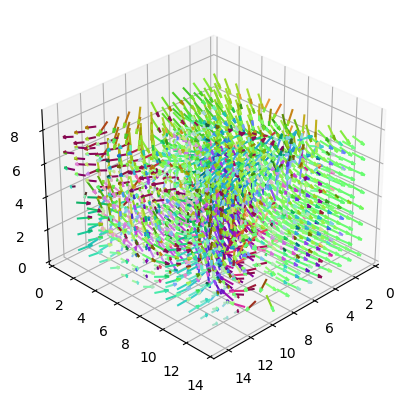

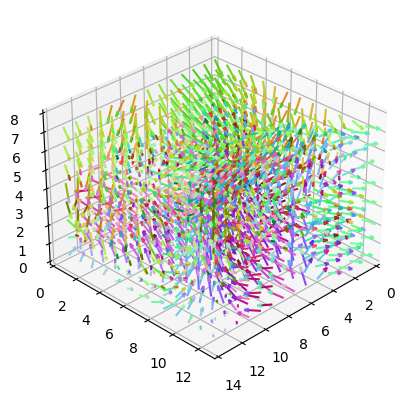

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure and 3D axes
fig3d = plt.figure('p')
ax3 = fig3d.add_subplot(111, projection='3d')

# Compute the magnitudes of the vectors
magnitudes = np.linalg.norm(flow, axis=1)

# Normalize the flow vectors
normalized_flow = flow / magnitudes[:, np.newaxis]

# Convert orientations to RGB colors
colors = np.zeros((len(magnitudes), 3))
colors[:, 0] = normalized_flow[:, 0]   # Red component (x-axis)
colors[:, 1] = normalized_flow[:, 1]   # Green component (y-axis)
colors[:, 2] = normalized_flow[:, 2]   # Blue component (z-axis)

# Normalize the colors to the range of 0-1
colors = (colors - colors.min()) / (colors.max() - colors.min())

# Plot the vectors with colored orientations
ax3.quiver(prev_pts[:, 0], prev_pts[:, 1], prev_pts[:, 2],
           flow[:, 0], flow[:, 1], flow[:, 2], normalize=True, color=colors)

# Set the limits and viewpoint of the plot
ax3.set_xlim([0, 15])
ax3.set_ylim([0, 14])
ax3.set_zlim([0, 9])
ax3.view_init(elev=30, azim=45)

# Save the figure
plt.savefig('vectors_ds.pdf', dpi=1500, bbox_inches='tight')

# Show the figure
plt.show()

#### SECOND VECTOR FIELD
fig3d = plt.figure('p')
ax3 = fig3d.add_subplot(111, projection='3d')

# Compute the magnitudes of the vectors
magnitudes = np.linalg.norm(flow2, axis=1)

# Normalize the flow vectors
normalized_flow = flow2 / magnitudes[:, np.newaxis]

# Convert orientations to RGB colors
colors = np.zeros((len(magnitudes), 3))
colors[:, 0] = normalized_flow[:, 0]   # Red component (x-axis)
colors[:, 1] = normalized_flow[:, 1]   # Green component (y-axis)
colors[:, 2] = normalized_flow[:, 2]   # Blue component (z-axis)

# Normalize the colors to the range of 0-1
colors = (colors - colors.min()) / (colors.max() - colors.min())

# Plot the vectors with colored orientations
ax3.quiver(prev_pts[:, 0], prev_pts[:, 1], prev_pts[:, 2],
           flow2[:, 0], flow2[:, 1], flow2[:, 2], normalize=True, color=colors)

# Set the limits and viewpoint of the plot
ax3.set_xlim([0, 14])
ax3.set_ylim([0, 13])
ax3.set_zlim([0, 8])
ax3.view_init(elev=30, azim=45)

# Save the figure
plt.savefig('vectors_ds_2.pdf', dpi=1500, bbox_inches='tight')

# Show the figure
plt.show()


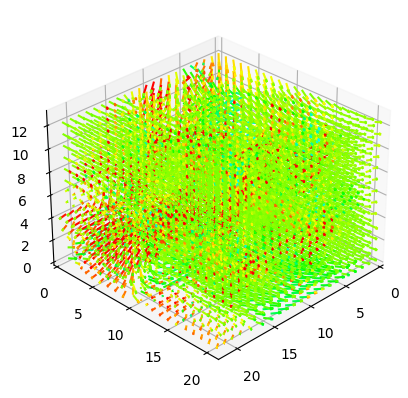

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure and 3D axes
fig3d = plt.figure('p')
ax3 = fig3d.add_subplot(111, projection='3d')

# Compute the magnitudes of the vectors
magnitudes = np.linalg.norm(flow, axis=1)

# Normalize the flow vectors
normalized_flow = flow / magnitudes[:, np.newaxis]

# Compute the orientations of the vectors
orientations = np.arctan2(normalized_flow[:, 1], normalized_flow[:, 0])

# Color the vectors based on their orientations
colors = orientations / (2 * np.pi)

# Plot the vectors with colored orientations
ax3.quiver(prev_pts[:, 0], prev_pts[:, 1], prev_pts[:, 2],
           flow[:, 0], flow[:, 1], flow[:, 2], normalize=True, color=plt.cm.hsv(colors))

# Set the colorbar to show the orientation values
#cbar = plt.colorbar(orientation='horizontal')
#cbar.set_label('Orientation')

# Set the limits and viewpoint of the plot
ax3.set_xlim([0, 22])
ax3.set_ylim([0, 21])
ax3.set_zlim([0, 13])
ax3.view_init(elev=30, azim=45)

# Save the figure
plt.savefig('vectors.pdf', dpi=800, bbox_inches='tight')

# Show the figure
plt.show()
